2024-09-09 - Ronen Shekel

# Experiment goals 

In the Haar random measurements paper, we say that an advantage of the method is that it does not require a common reference frame, and we could do this check even if the photons propagate through a multicore fiber / scattering media. We model this by inducing random phases on each of the incoming spots (on plane 1). 

This is in contrast to traditional methods, such as measuring strong correlations in the regular basis and in the DFT basis. 

In this experiment we calculate masks for a second MUB of the 5d basis (we refer to as "QKD MUB2" for historic reasons). We then measure the strong correlations in this basis, using the correct input phases. We then add randon input phases / zero input phases, and this results in random correlations. This showcases the sensitivity of the traditional methods to random phases. 

In [10]:
%matplotlib inline 
import os 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import glob 
from pianoq.simulations.mplc_sim.mplc_sim_result import MPLCMasks
from pianoq.lab.mplc.phase_finder_result import PhaseFinderResult
from pianoq_results.scan_result import ScanResult
from pianoq.lab.mplc.discrete_scan_result import DiscreetScanResult
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_09_09_QKD_random_phases'

We begin by calculating the masks, which are shown here: 

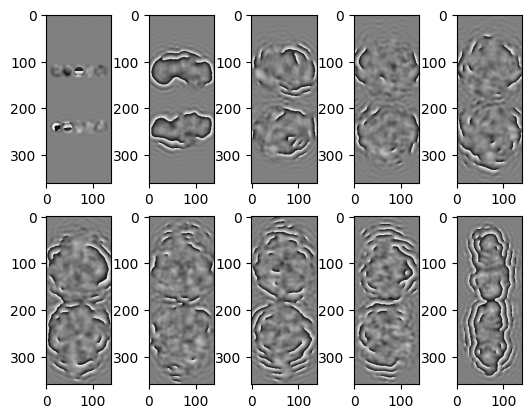

In [11]:
masks_path = glob.glob(fr'{dir_path}\*.masks')[0]
msks = MPLCMasks()
msks.loadfrom(masks_path)
msks.show()

The actual transformation is this, based on "All Mutually Unbiased Bases in Dimensions Two to Five" (2018). 

The columns in the matrix are the basis elements 

```
q = np.exp(2j * np.pi / 5)  # Complex fifth root of unity
MUB = np.array([
    [1, 1, 1, 1, 1],
    [1, q, q ** 2, q ** 3, q ** 4],
    [1, q ** 2, q ** 4, q, q ** 3],
    [1, q ** 3, q, q ** 4, q ** 2],
    [1, q ** 4, q ** 3, q ** 2, q]
]) / np.sqrt(5)  # eq. 33

U = MUB.conj().T  # To measure in X basis, we need to act with X^dag on the state
U2 = np.conj(U)
zeros_mat = np.zeros((5, 5))
full_transformation = np.block([[U, zeros_mat],
                                [zeros_mat, U2]])
```
If U2=conj(U1) the correlations will be on the identity, since Klyshko provides the transpose,
and together with the conj we get U^-1 in the Klyshko return

We then do a single counts scan to see the exact spot locations (Ignore the noisy panel, one is signal and the other is idler, but both scans record all the time also the other singles channel, and the scans run simultaneously, but in different scripts):  

C:\code\pianoq_results\pianoq_results\scan_result.py:142: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


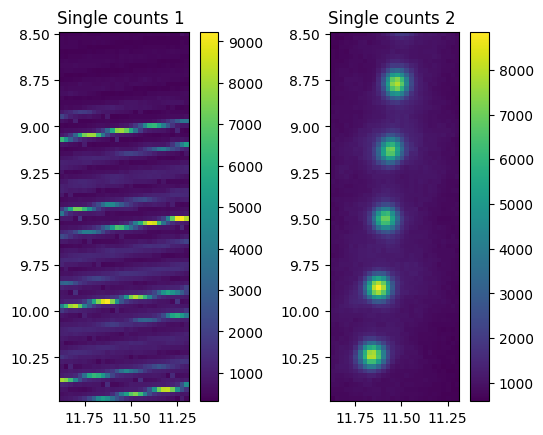

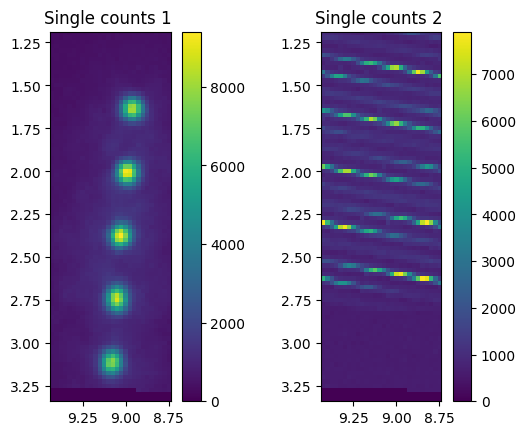

In [13]:
path_sig = glob.glob(fr'{dir_path}\*signal_res_1.scan')[0]
path_idl = glob.glob(fr'{dir_path}\*idler_res_1.scan')[0]

res_sig = ScanResult()
res_idl = ScanResult()
res_idl.loadfrom(path_idl)
res_sig.loadfrom(path_sig)
res_idl.show_singles()
res_sig.show_singles()

Since we do DFT on one photon and DFT.conj() on the second, we expect strong correlations on the diagonal. But there are these mysterious random phases. So to find them we go to (0,0) and find the best phases that get a strong signal in (0,0). These phases fix the whole matrix to be like what we wanted, suggesting that we indeed fix a real physical thing. 

Here are the found fixing phases ("old" and "new" refer to two different wavefront matching runs I did. And it seems they result in the same phases, which makes sense of course... Remember that 0 and 2*pi are the same. 

array([5.27195142, 1.06204488, 1.0662511 , 0.64159401, 5.81194364,
       0.39239066, 0.3575338 , 6.27549975, 0.07658275, 0.01601564])

array([5.32763157, 1.13888194, 1.16319575, 0.62473823, 5.20208745,
       0.13364829, 6.19309335, 6.15554079, 0.27453943, 6.017723  ])

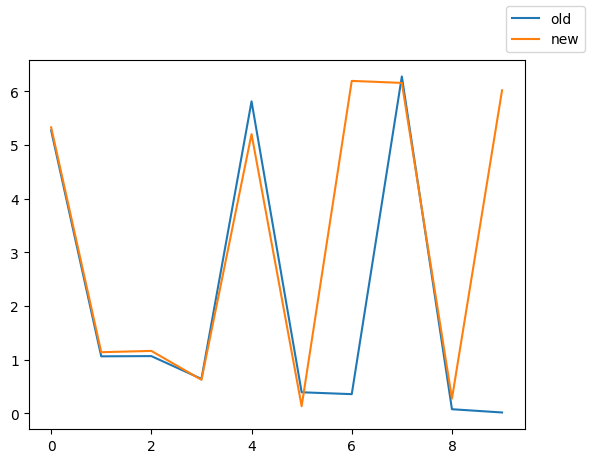

In [14]:
r1 = PhaseFinderResult()
r2 = PhaseFinderResult()
r1.loadfrom(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_05_QKD_random_phases\2024_09_09_09_25_32_QKD_MUB2_signal.phases")
r2.loadfrom(r"G:\My Drive\Projects\MPLC\results\lab\2024_09_09_QKD_random_phases\2024_09_09_13_44_45_QKD_MUB2_signal.phases")
modes_to_keep = np.array([3, 8, 13, 18, 23, 28, 33, 38, 43, 48]) - 1
display(r1.phases[modes_to_keep])
display(r2.phases[modes_to_keep])

fig, ax = plt.subplots()
ax.plot(r1.phases[modes_to_keep], label="old")
ax.plot(r2.phases[modes_to_keep], label="new")
fig.legend()

And here are the correlation matrices before and after fixing:

C:\Users\owner\AppData\Local\Temp\ipykernel_28800\1803328133.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


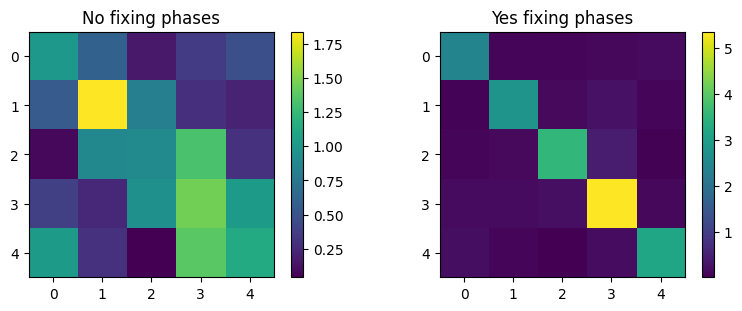

In [15]:
none_path = glob.glob(r'G:\My Drive\Projects\MPLC\results\lab\2024_09_09_QKD_random_phases\2024*none*coin_400.dscan')[0]
c_none = np.load(none_path)['coincidences']
good_path = glob.glob(r'G:\My Drive\Projects\MPLC\results\lab\2024_09_09_QKD_random_phases\2024*good*coin_400.dscan')[0]
c_good = np.load(good_path)['coincidences']

fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 3))
imm = axes[0].imshow(c_none)
axes[0].set_title('No fixing phases')
fig.colorbar(imm, ax=axes[0])
imm = axes[1].imshow(c_good)
axes[1].set_title('Yes fixing phases')
fig.colorbar(imm, ax=axes[1])
fig.show()

Finally we add random phases, and as expected we see random results. 

C:\Users\owner\AppData\Local\Temp\ipykernel_28800\308540665.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


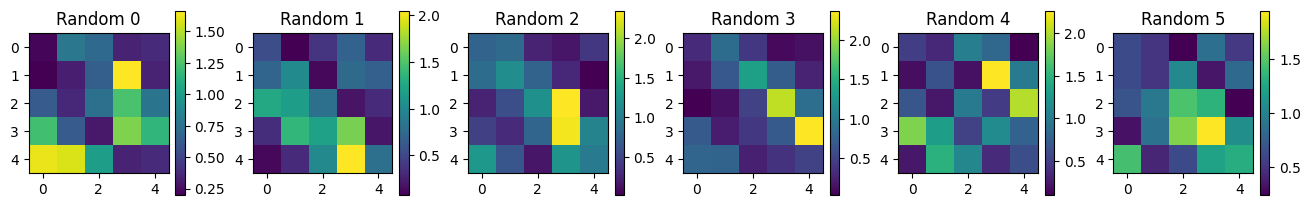

In [16]:
random_paths = glob.glob(r'G:\My Drive\Projects\MPLC\results\lab\2024_09_09_QKD_random_phases\2024*random*.dscan')
N = len(random_paths)

fig, axes = plt.subplots(1, N, figsize=(13, 2), constrained_layout=True)

for i in range(N):
    c = np.load(random_paths[i])['coincidences']
    imm = axes[i].imshow(c)
    axes[i].set_title(f'Random {i}')
    fig.colorbar(imm, ax=axes[i])
fig.show()